D:\FlagDetectionDatasets\ExportedDatasetsSelected\Job_160R


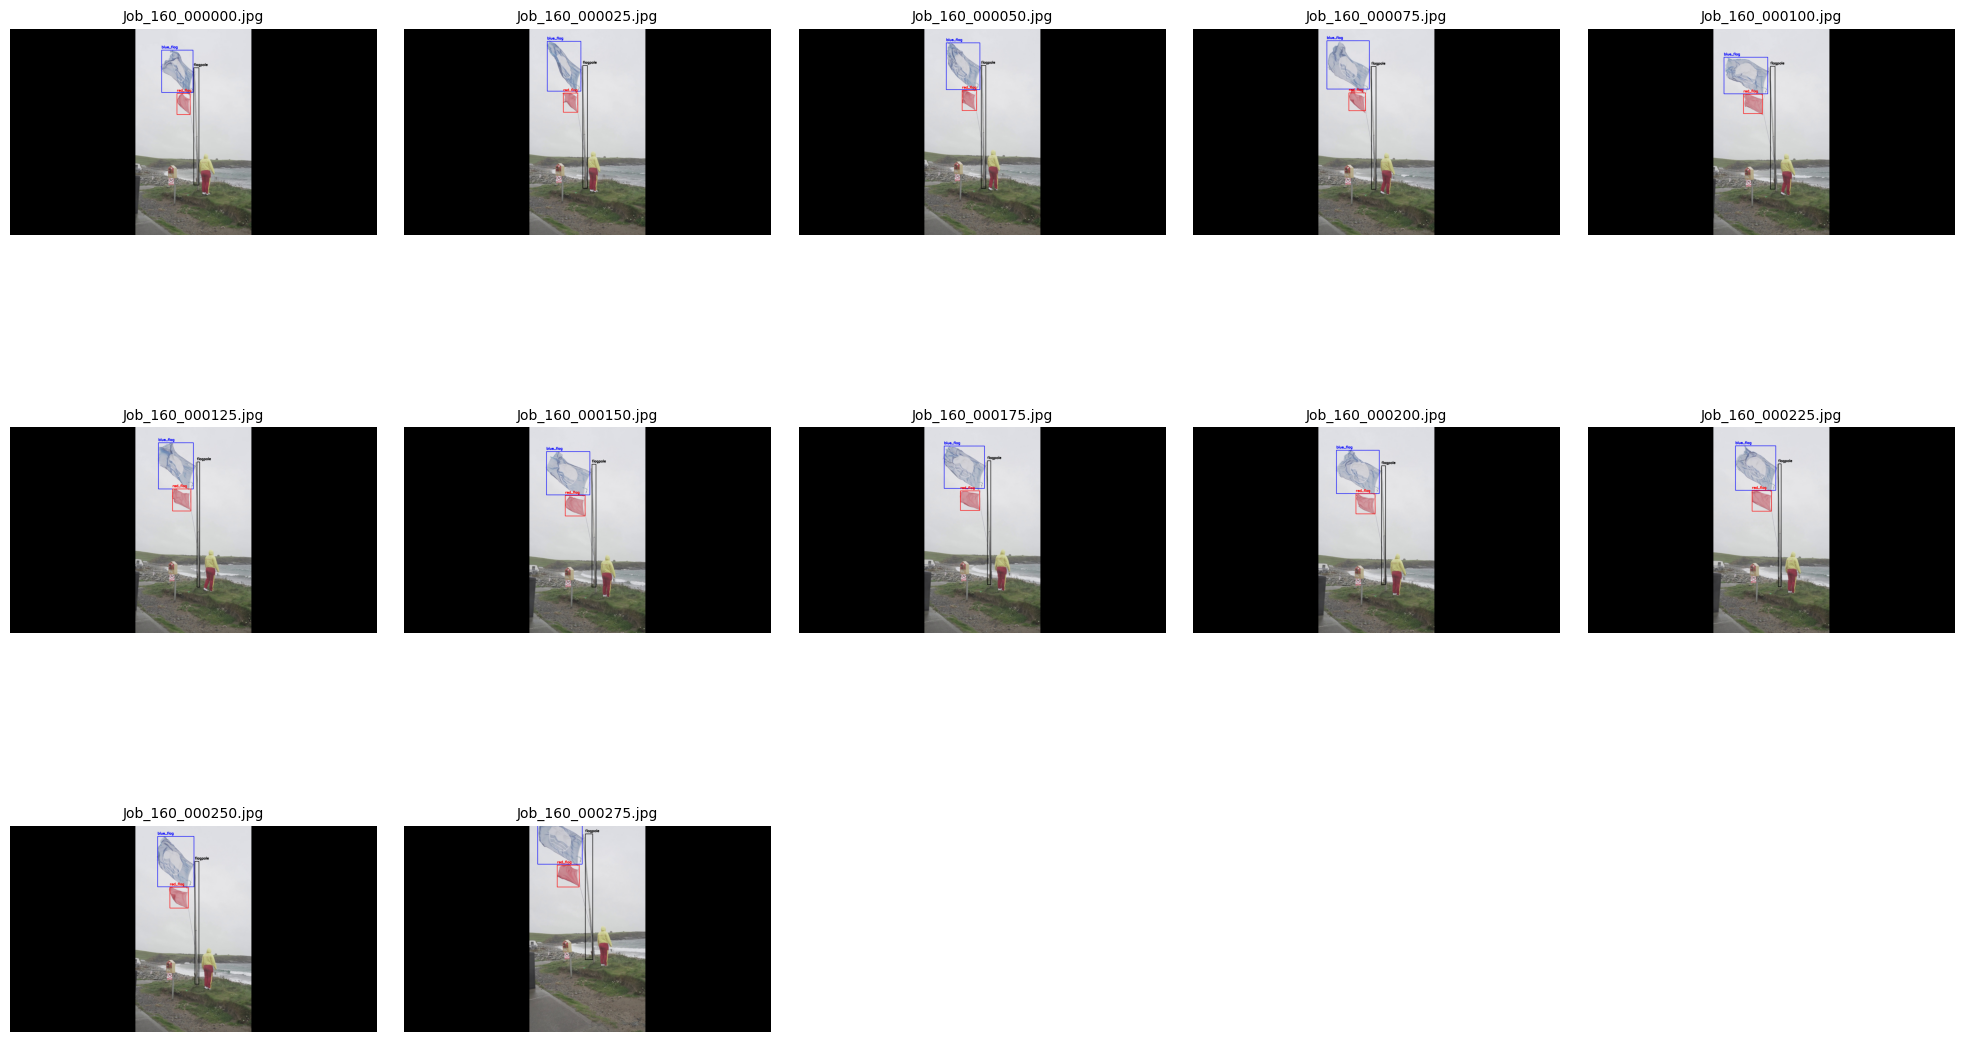

D:\FlagDetectionDatasets\ExportedDatasetsSelected\Job_160R


In [36]:
# QuickPreview.jpynb
# Main file if any q about duplicates...
import os
import cv2
import matplotlib.pyplot as plt  # For preview
import numpy as np

def load_class_names(obj_names_path):
    """
    Loads class names from the obj.names file.
    Args:
        obj_names_path (str): Path to the obj.names file.
    Returns:
        list: A list of class names.
    """
    if not os.path.exists(obj_names_path):
        raise FileNotFoundError(f"obj.names file not found at {obj_names_path}")
    with open(obj_names_path, "r") as f:
        class_names = f.read().strip().split("\n")
    return class_names

def preview_images(image_folder, annotation_folder, obj_names_path, preview_count=3):
    """
    Displays images with bounding boxes and class labels.
    Args:
        image_folder (str): Folder containing images.
        annotation_folder (str): Folder containing annotations.
        obj_names_path (str): Path to the obj.names file.
        preview_count (int): Number of images to preview.
    """
    # Define color mapping for classes
    colors = {
        0: (0, 0, 255),     # Red for class 0
        1: (0, 140, 255),   # Dark Orange for class 1
        2: (255, 0, 0),     # Blue for class 2
        3: (0, 255, 0),     # Green for class 3
        4: (0, 0, 0)        # Black for class 4
    }
    
    class_names = load_class_names(obj_names_path)
    image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    for image_file in image_files[:preview_count]:
        image_path = os.path.join(image_folder, image_file)
        print(image_path)
        annotation_path = os.path.join(annotation_folder, os.path.splitext(image_file)[0] + ".txt")

        if not os.path.exists(annotation_path):
            continue

        image = cv2.imread(image_path)
        preview = image.copy()

        with open(annotation_path, "r") as f:
            annotations = f.readlines()

        for ann in annotations:
            class_id, cx, cy, bw, bh = map(float, ann.split())
            x_center = int(cx * image.shape[1])
            y_center = int(cy * image.shape[0])
            box_width = int(bw * image.shape[1])
            box_height = int(bh * image.shape[0])
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)
            
            # Determine box color based on class_id
            color = colors.get(int(class_id), (255, 255, 255))  # Default to white if class ID is unknown
            
            # Draw the bounding box
            cv2.rectangle(preview, (x1, y1), (x2, y2), color, 2)
            
            # Draw the class label to the right of the bounding box
            label = class_names[int(class_id)]
            text_x = x2 + 5  # Slightly to the right of the bounding box
            text_y = y1 + 20  # Adjust vertical position
            cv2.putText(preview, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 2)

        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(preview, cv2.COLOR_BGR2RGB))
        plt.title(f"Preview of {image_file}")
        plt.axis("off")
        plt.show()


def preview_images_in_grid(image_folder, annotation_folder, obj_names_path, preview_count=15):
    """
    Displays images with bounding boxes and class labels in a grid with 5 columns.

    Args:
        image_folder (str): Folder containing images.
        annotation_folder (str): Folder containing annotations.
        obj_names_path (str): Path to the obj.names file.
        preview_count (int): Number of images to preview.
    """
    # Define color mapping for classes
    colors = {
        0: (0, 0, 255),     # Red for class 0
        1: (0, 140, 255),   # Dark Orange for class 1
        2: (255, 0, 0),     # Blue for class 2
        3: (0, 255, 0),     # Green for class 3
        4: (0, 0, 0)        # Black for class 4
    }

    # Load class names
    def load_class_names(obj_names_path):
        with open(obj_names_path, 'r') as file:
            return {i: line.strip() for i, line in enumerate(file)}

    class_names = load_class_names(obj_names_path)
    image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Calculate grid dimensions
    cols = 5
    rows = -(-preview_count // cols)  # Ceiling division for rows

    plt.figure(figsize=(cols * 4, rows * 4))  # Adjust figure size for larger thumbnails

    for i, image_file in enumerate(image_files[:preview_count]):
        image_path = os.path.join(image_folder, image_file)
        annotation_path = os.path.join(annotation_folder, os.path.splitext(image_file)[0] + ".txt")

        if not os.path.exists(annotation_path):
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            continue

        preview = image.copy()

        with open(annotation_path, "r") as f:
            annotations = f.readlines()

        for ann in annotations:
            class_id, cx, cy, bw, bh = map(float, ann.split())
            x_center = int(cx * image.shape[1])
            y_center = int(cy * image.shape[0])
            box_width = int(bw * image.shape[1])
            box_height = int(bh * image.shape[0])
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)

            # Determine box color based on class_id
            color = colors.get(int(class_id), (255, 255, 255))  # Default to white if class ID is unknown

            # Draw the bounding box
            cv2.rectangle(preview, (x1, y1), (x2, y2), color, 2)

            # Draw the class label
            label = class_names[int(class_id)]
            cv2.putText(preview, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Plot the image with annotations
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(preview, cv2.COLOR_BGR2RGB))
        plt.title(image_file, fontsize=10)
        plt.axis("off")

    plt.tight_layout(pad=2.0)  # Reduce gaps between images
    plt.show()


def preview_images_no_annotations(image_folder, preview_count=6):
    """
    Displays images in a 3x2 grid layout without annotations.
    Args:
        image_folder (str): Folder containing images.
        preview_count (int): Total number of images to preview.
    """
    # Get all image files from the folder
    image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    # Calculate grid layout
    columns = 3
    rows = 2
    grid_count = min(preview_count, len(image_files))

    # Initialize the plot
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5))
    axes = axes.flatten()

    for idx, image_file in enumerate(image_files[:grid_count]):
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)

        # Convert BGR to RGB for display
        preview = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display image in grid
        axes[idx].imshow(preview)
        axes[idx].set_title(image_file, fontsize=10)
        axes[idx].axis("off")

    # Turn off unused subplots
    for ax in axes[grid_count:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()



# Run section 
if __name__ == "__main__":
    #preview_count = 10
    #base_src = r'D:/FlagDetectionDatasets/ExportedDatasetsExtracted'
    #base_tgt = os.path.normpath('D:/FlagDetectionDatasets/Augmentation/Switch_class_in_images_sets/Switch_class_1_from_43_into_88')
    # base_src = 'D:/FlagDetectionDatasets/Augmentation/Switch_class_in_images_sets/Switch_class_1_from_43_into_88'
    # base_src = 'D:/FlagDetectionDatasets/Augmentation/Switch_class_in_images_sets/Switch_class_1_from_43_into_88'
    #base_tgt = os.path.normpath('D:/FlagDetectionDatasets/Augmentation/Switch_class_in_images_sets/Switch_class_1_from_43_into_88')
    #base_tgt= os.path.normpath('D:/FlagDetectionDatasets/Augmentation')
    #base_src = os.path.normpath('D:/FlagDetectionDatasets/ExportedDatasetsReduced')
    base_src = os.path.normpath('D:/FlagDetectionDatasets/ExportedDatasetsSelected')
    #base_src = os.path.normpath('D:/FlagDetectionDatasets/ExportedDatasetsSelected')
    #base_tgt = os.path.normpath('D:/FlagDetectionDatasets/Augmentation/scaled/augmented')
  
    previewjob='Job_160R'
    preview_folder=  os.path.join(base_src, previewjob)
    print(preview_folder)
    #obj_names_path=  os.path.join(base_src, "obj.names")
    obj_names_path = 'D:/FlagDetectionDatasets/ExportedDatasetsReduced/obj.names'
    #preview_foldertmp = os.path.join(base_tmp, previewjob)
    #preview_images(preview_folder, preview_folder, obj_names_path, preview_count=100)
    preview_images_in_grid(preview_folder, preview_folder, obj_names_path, preview_count=100)
    #preview_images_no_annotations(preview_folder, preview_count=6)
    
    print(preview_folder)
    #print(obj_names_path)

    # To do: Needs to be improved 
    # For now do landscape first to a target landscape 
    # Then do portrait to a target portrait
    # Then merge 
    # Does not create annotatnion where the lanscape image is upscaled 
